Importing the necessary dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import nltk
from nltk.corpus import stopwords


/home/ai_ds_team/anaconda3/envs/Bert/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loading the dataset and reviewing it

In [2]:
df = pd.read_csv('Shuffled_CSV.csv')

In [3]:
df

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,TP3JOzhokiB_jLkMXlFm7w,EKy39Tkb90Sdrd_91smkkw,ZwkdQGbg27T1jtFSP6-ggw,3,0,0,0,Online order/Takeout Review\n\nI ordered an Eg...,2016-12-13 19:42:22
1,wS3FH2ta4ID4y1oMr9d52w,EJHPq713MuIh-U1gVv8PTQ,qNiZVduTtw3d1zGjHSM9zg,5,2,1,1,"This gym is awesome. The environment is big, b...",2013-05-06 03:47:03
2,bb5axCMeArv_onk1GXGHFg,-D0-Y24Lf8MuGpCCYgnkoA,3LYKr4nbBVcNUlC4QelSfA,1,0,0,0,Can driver hit both cars in front and behind h...,2019-07-15 02:39:28
3,TGXtz3GLWGonBb7w1rk5rw,WI_popiz94TU4oksd-T60Q,Yu401DtSmkXpJhgXnQcFrg,3,0,0,0,Was alway here before found the ocean harbor. ...,2015-06-19 16:52:06
4,zTB2Jxk3XLn6gu7wyhwvMg,2gUXdt8OGs-ZslJLQTVLBA,tPqKzAu8DAKfONM4jXxj1Q,1,5,7,0,Complete fake. Told me i had been cursed n wan...,2016-08-10 02:27:44
...,...,...,...,...,...,...,...,...,...
74995,WiCsLGSWqXu4FDkYrWaZag,dbWn8HCsG3eI9AmS2G3O2g,gTwgRz52imtyggXCrH2Xng,4,1,0,0,"This place is neat. Neat art, neat gifts, neat...",2012-11-24 01:30:55
74996,C0_-EQmOMvGmdLr2rogzeg,6UU6fIyUfQTVSD8smwAsLQ,BmXHqVREFyTe1Fy0fyCvFw,3,0,0,0,Great location. Cash only so be prepared. Food...,2017-03-27 03:15:52
74997,uJqB7aQCvdzA-Wuiqseu8A,tLubOlCAOEd3hd7Jd18MpA,LbAl4kMZ3PA4ca42GIrY4w,1,3,0,0,We went here for brunch a week after they open...,2011-08-07 19:29:50
74998,eBnSrMM1dmRu_N9KU8XXdg,Ccwx1naaEcaVNG-gd3OFuw,469cDiOBw6Hs0dUdFQrEmg,1,12,0,1,See the end of my comments for help getting an...,2021-06-21 16:11:24


In [4]:
print(df.shape)

(75000, 9)


In [5]:
#Print the header
Header = df.head(5)
print(Header)

                review_id                 user_id             business_id  \
0  TP3JOzhokiB_jLkMXlFm7w  EKy39Tkb90Sdrd_91smkkw  ZwkdQGbg27T1jtFSP6-ggw   
1  wS3FH2ta4ID4y1oMr9d52w  EJHPq713MuIh-U1gVv8PTQ  qNiZVduTtw3d1zGjHSM9zg   
2  bb5axCMeArv_onk1GXGHFg  -D0-Y24Lf8MuGpCCYgnkoA  3LYKr4nbBVcNUlC4QelSfA   
3  TGXtz3GLWGonBb7w1rk5rw  WI_popiz94TU4oksd-T60Q  Yu401DtSmkXpJhgXnQcFrg   
4  zTB2Jxk3XLn6gu7wyhwvMg  2gUXdt8OGs-ZslJLQTVLBA  tPqKzAu8DAKfONM4jXxj1Q   

   stars  useful  funny  cool  \
0      3       0      0     0   
1      5       2      1     1   
2      1       0      0     0   
3      3       0      0     0   
4      1       5      7     0   

                                                text                 date  
0  Online order/Takeout Review\n\nI ordered an Eg...  2016-12-13 19:42:22  
1  This gym is awesome. The environment is big, b...  2013-05-06 03:47:03  
2  Can driver hit both cars in front and behind h...  2019-07-15 02:39:28  
3  Was alway here before found the

Doing some EDA

In [6]:
# check for null values
null_Values = df.isnull().sum()
print(null_Values)

review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64


In [7]:
#Finding the languages 
from langdetect import detect
for i in range (len(df["text"])):
    language = detect(df['text'][i])
    if language != 'en':
        print(language)
        print(df['text'][i])
        print(i)
        df.drop(i, inplace=True)
        

es
Panadería las americas. En lugar de excelencia y delicia elaborando ele jorge pan y postres para cada ocasión y gusto . Sin duda la mejor
1247
it
Fantastic garlic knots, prosciutto and basil pizza, and pesto pizza! Thanks Yelp for the recommendation!
1509
da
Just got some ribs for under 5bucks mmmm delicious :)
1531
fr
Le paradis de la sucrerie à gros prix.

Mon épouse n'a pu résister et nous y sommes entrés hier soir le 7 juillet 2015.  Tant qu'à moi, je suis béni, car je dois faire très attention en résistant à ces tentations de type doux satanisme avec mes tendances diabétiques sinon j'aurais certainement commis un gros péché chocolaté.  Après avoir fais le tour une couple de fois, mon épouse décida d'arrêter son choix sur une petite galette de chocolat dans une vitrine là où ces merveilles valaient $19.95 le kilo.  Son petit péché coûta $5.03 ce qui nous semble trop cher malgré le fait qu'elle avait un poids impressionnant malgré sa petitesse.  J'en saisi l'occasion pour faire p

In [8]:
df.reset_index(drop=True, inplace=True)


In [9]:
df['text'][0]

"Online order/Takeout Review\n\nI ordered an Egg Salad Club Sandwich and sweet potato fries through Yelp and called before I picked up to ensure that my food was ready. That was a good idea because through that call, I found out that they ran out of ink and couldn't see the order. \nThe woman on the phone wasn't that kind/apologetic at the time of our call but I still worked with her and repeated my order. \n\nWhen I got inside, there was a little chaos because although I pre-paid, they had no ink to verify it apart from the receipt on my phone. I was just observing the cashier for a few minutes and wrote down the confirmation number and contact information. I didn't receive a kind word of consolation or apology until I was about to leave with my food. Usually, they should start out the conversation with the apology for confusion and inconvenience and then be kind as they work through their issues. \n\nFood: The Egg Salad Club Sandwich was absolutely burnt uûdelicious. The white bread 

In [10]:
df

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,TP3JOzhokiB_jLkMXlFm7w,EKy39Tkb90Sdrd_91smkkw,ZwkdQGbg27T1jtFSP6-ggw,3,0,0,0,Online order/Takeout Review\n\nI ordered an Eg...,2016-12-13 19:42:22
1,wS3FH2ta4ID4y1oMr9d52w,EJHPq713MuIh-U1gVv8PTQ,qNiZVduTtw3d1zGjHSM9zg,5,2,1,1,"This gym is awesome. The environment is big, b...",2013-05-06 03:47:03
2,bb5axCMeArv_onk1GXGHFg,-D0-Y24Lf8MuGpCCYgnkoA,3LYKr4nbBVcNUlC4QelSfA,1,0,0,0,Can driver hit both cars in front and behind h...,2019-07-15 02:39:28
3,TGXtz3GLWGonBb7w1rk5rw,WI_popiz94TU4oksd-T60Q,Yu401DtSmkXpJhgXnQcFrg,3,0,0,0,Was alway here before found the ocean harbor. ...,2015-06-19 16:52:06
4,zTB2Jxk3XLn6gu7wyhwvMg,2gUXdt8OGs-ZslJLQTVLBA,tPqKzAu8DAKfONM4jXxj1Q,1,5,7,0,Complete fake. Told me i had been cursed n wan...,2016-08-10 02:27:44
...,...,...,...,...,...,...,...,...,...
74927,WiCsLGSWqXu4FDkYrWaZag,dbWn8HCsG3eI9AmS2G3O2g,gTwgRz52imtyggXCrH2Xng,4,1,0,0,"This place is neat. Neat art, neat gifts, neat...",2012-11-24 01:30:55
74928,C0_-EQmOMvGmdLr2rogzeg,6UU6fIyUfQTVSD8smwAsLQ,BmXHqVREFyTe1Fy0fyCvFw,3,0,0,0,Great location. Cash only so be prepared. Food...,2017-03-27 03:15:52
74929,uJqB7aQCvdzA-Wuiqseu8A,tLubOlCAOEd3hd7Jd18MpA,LbAl4kMZ3PA4ca42GIrY4w,1,3,0,0,We went here for brunch a week after they open...,2011-08-07 19:29:50
74930,eBnSrMM1dmRu_N9KU8XXdg,Ccwx1naaEcaVNG-gd3OFuw,469cDiOBw6Hs0dUdFQrEmg,1,12,0,1,See the end of my comments for help getting an...,2021-06-21 16:11:24


In [11]:
nltk.download('stopwords')
",".join(stopwords.words("english"))
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ai_ds_team/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
# Define the remove_stop_words function
def remove_stop_words(x):
    return " ".join([word for word in str(x).split() if word.lower() not in stop_words])

# Apply the function to create a new column 'filtered_text'
df['filtered_text'] = df['text'].apply(lambda x: remove_stop_words(x))

In [13]:
df['filtered_text'][0]

'Online order/Takeout Review ordered Egg Salad Club Sandwich sweet potato fries Yelp called picked ensure food ready. good idea call, found ran ink see order. woman phone kind/apologetic time call still worked repeated order. got inside, little chaos although pre-paid, ink verify apart receipt phone. observing cashier minutes wrote confirmation number contact information. receive kind word consolation apology leave food. Usually, start conversation apology confusion inconvenience kind work issues. Food: Egg Salad Club Sandwich absolutely burnt uûdelicious. white bread used slightly thicker soft. great. contents sandwich (Tomato, lettuce, bacon) tasted fresh. loved it. sweet potato (waffle) fries okay. served many burnt fires enjoy though. picked ate non-burnt pieces. happy gone back fresh fries needed return work.'

In [14]:
duplicates = df.duplicated().sum()
print(duplicates)


0


Visualizing the dataset

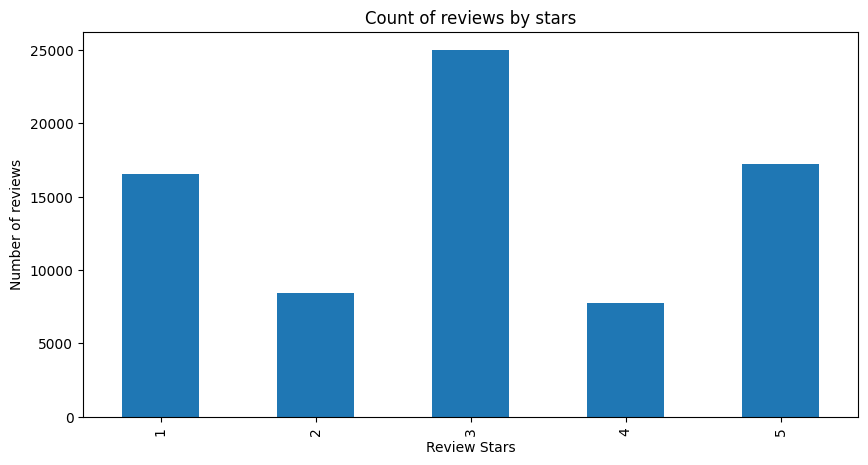

In [15]:
Bar_plot = df["stars"].value_counts().sort_index() \
    .plot(kind='bar',
           title="Count of reviews by stars",
           figsize=(10,5))

Bar_plot.set_xlabel('Review Stars')
Bar_plot.set_ylabel('Number of reviews')
plt.show()

In [16]:
#2 for positive, 1 for neutral, 3 for negative
df["Reviews"] = df["stars"].apply(lambda score: 2 if score >= 4 else 1 if score == 3 else 0)

In [17]:
df["Reviews"].value_counts()

Reviews
0    24984
1    24976
2    24972
Name: count, dtype: int64

In [18]:
New_DataFrame = df[['filtered_text','Reviews']]

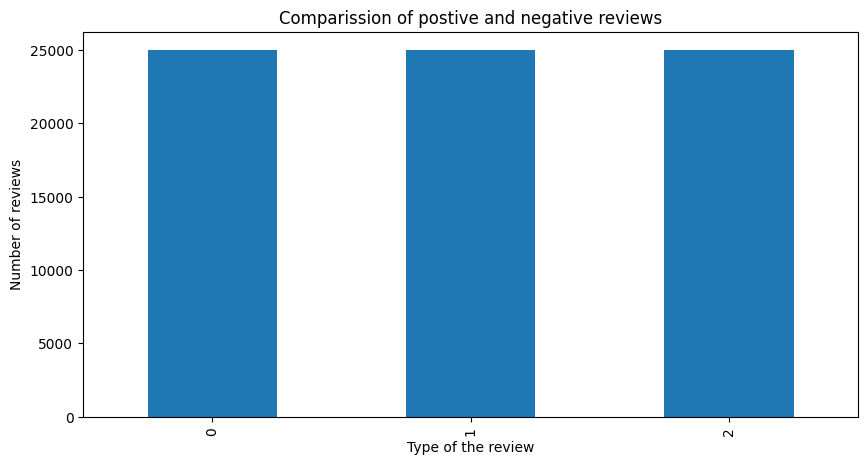

In [19]:
Bar_plot = df["Reviews"].value_counts().sort_index() \
    .plot(kind='bar',
           title="Comparission of postive and negative reviews",
           figsize=(10,5))

Bar_plot.set_xlabel('Type of the review')
Bar_plot.set_ylabel('Number of reviews')
plt.show()

In [20]:
New_DataFrame.head(5)

,filtered_text,Reviews
0,Online order/Takeout Review ordered Egg Salad ...,1
1,"gym awesome. environment big, bright, clean, q...",2
2,driver hit cars front behind park even though ...,0
3,alway found ocean harbor. wired smell restaurant.,1
4,Complete fake. Told cursed n wanted pay remove...,0


Splitting the dataset as Train and Test

In [21]:
# Splitting the dataset into training and testing datasets
train_Text_Data, test_Text_Data, train_label_Data, test_labels_Data = train_test_split(New_DataFrame['filtered_text'], New_DataFrame['Reviews'], test_size=0.2,stratify=New_DataFrame["Reviews"], random_state=1)

In [22]:
print(train_Text_Data.size)
print(test_labels_Data.size)

59945
14987


In [23]:
#Loading the Pre-Trained model with the tokenizer
model_Name = "cardiffnlp/twitter-roberta-base-sentiment-latest"
model = AutoModelForSequenceClassification.from_pretrained(model_Name)
tokenizer = AutoTokenizer.from_pretrained(model_Name)

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [24]:
# Tokenizing the input text data
train_text_encodings = tokenizer(train_Text_Data.tolist(), truncation=True, padding=True, max_length=50, add_special_tokens=True)
test_text_encodings = tokenizer(test_Text_Data.tolist(), truncation=True, padding=True, max_length=50, add_special_tokens=True)

In [25]:
# Convert labels and encodings in dataset objects
train_Dataset_Object = TensorDataset(torch.tensor(train_text_encodings['input_ids']),
                              torch.tensor(train_text_encodings['attention_mask']),
                              torch.tensor(train_label_Data.tolist()))
test_Dataset_Object = TensorDataset(torch.tensor(test_text_encodings['input_ids']),
                             torch.tensor(test_text_encodings['attention_mask']),
                             torch.tensor(test_labels_Data.tolist()))

In [26]:
# Creating the train loaders using the dataset objects
train_Data_Loader = DataLoader(train_Dataset_Object, batch_size=4, shuffle=True)
test_Data_Loader = DataLoader(test_Dataset_Object, batch_size=4, shuffle=False)

In [27]:
# Setting the device for GPU or CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
print(device)

cuda


In [28]:
# Training hyperparameters
epochs = 5
optimizer = torch.optim.AdamW(model.parameters(),
                              weight_decay=0.01,
                              lr=2e-5)

In [29]:
# Training loop
train_losses = []
start_time = time.time()

for epoch in range(epochs):
    model.train()
    epoch_loss = 0

    # Creating a progress bar for batches
    progress_bar = tqdm(enumerate(train_Data_Loader, 1), total=len(train_Data_Loader), desc=f'Epoch {epoch + 1}/{epochs}')

    for batch_idx, batch in progress_bar:
        input_ids, attention_mask, Reviews = map(lambda x: x.to(device), batch)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=Reviews)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

        # Calculating average training loss for each epoch
        avg_epoch_loss = epoch_loss / batch_idx
        train_losses.append(avg_epoch_loss)

        progress_bar.set_postfix({'Training Loss': avg_epoch_loss})

    # Calculate and display the total training time at the end of each epoch
    elapsed_Total_Time = time.time() - start_time
    total_minutes = elapsed_Total_Time / 60
    print(f'Total Training Time for Epoch {epoch + 1}: {elapsed_Total_Time:.2f} minutes')


Epoch 1/5: 100%|██████████| 14987/14987 [13:26<00:00, 18.57it/s, Training Loss=0.637]


Total Training Time for Epoch 1: 806.90 minutes


Epoch 2/5: 100%|██████████| 14987/14987 [13:31<00:00, 18.46it/s, Training Loss=0.51] 


Total Training Time for Epoch 2: 1618.62 minutes


Epoch 3/5: 100%|██████████| 14987/14987 [13:33<00:00, 18.43it/s, Training Loss=0.431]


Total Training Time for Epoch 3: 2431.73 minutes


Epoch 4/5: 100%|██████████| 14987/14987 [13:34<00:00, 18.40it/s, Training Loss=0.351]


Total Training Time for Epoch 4: 3246.26 minutes


Epoch 5/5: 100%|██████████| 14987/14987 [13:35<00:00, 18.39it/s, Training Loss=0.279]

Total Training Time for Epoch 5: 4061.29 minutes


In [30]:
# Save the trained model to the local pc
model.save_pretrained('Models1')
tokenizer.save_pretrained('Tokens1')

print("Model saved......")

Model saved......


Loading the model to do predictions

In [31]:
# Loading the saved fine-tuned model to get predictions
tokenizer = AutoTokenizer.from_pretrained('Tokens1')
model = AutoModelForSequenceClassification.from_pretrained('Models1')

# Setting the device for GPU or CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
print(f"Using device: {device}")

def get_predictions(review):
    # Tokenizing the user review
    input_Data = tokenizer(review,truncation=True, padding=True,return_tensors='pt',)
    input_ids = input_Data['input_ids'].to(device)
    attention_mask = input_Data['attention_mask'].to(device)

    # Getting the model prediction according to the user review
    with torch.no_grad():
        Prediction = model(input_ids, attention_mask=attention_mask)

    # Getting the predicted labels
    logits = Prediction.logits
    predicted_class = torch.argmax(logits, dim=1).item()

    return predicted_class


Using device: cuda


Testing the model

In [32]:
#Getting user reviews
user_Review1 = "Wow that is delicious"

In [33]:
review_Prediction = get_predictions(user_Review1)
if review_Prediction == 2:
    print("Positive Feedback.")
elif review_Prediction == 0:
    print("Negative Feedback.")
else:
    print("Neutral Feedback")

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Positive Feedback.


In [34]:
#Getting user reviews 2
user_Review2 = "Too spicy for my taste"

In [35]:
review_Prediction = get_predictions(user_Review2)
if review_Prediction == 2:
    print("Positive Feedback.")
elif review_Prediction == 0:
    print("Negative Feedback.")
else:
    print("Neutral Feedback")

Neutral Feedback


In [36]:
#Getting user reviews 3
user_Review3 = "Exceptional service"

In [37]:
review_Prediction = get_predictions(user_Review3)
if review_Prediction == 2:
    print("Positive Feedback.")
elif review_Prediction == 0:
    print("Negative Feedback.")
else:
    print("Neutral Feedback")

Positive Feedback.


In [38]:
#Getting user reviews 4
user_Review4 = "Causal atmosphere, average food"

In [39]:
review_Prediction = get_predictions(user_Review4)
if review_Prediction == 2:
    print("Positive Feedback.")
elif review_Prediction == 0:
    print("Negative Feedback.")
else:
    print("Neutral Feedback")

Neutral Feedback


In [40]:
#Getting user reviews 5
user_Review5 = "Music was too loud"

In [41]:
review_Prediction = get_predictions(user_Review5)
if review_Prediction == 2:
    print("Positive Feedback.")
elif review_Prediction == 0:
    print("Negative Feedback.")
else:
    print("Neutral Feedback")

Neutral Feedback


Evaluations of the model

In [42]:
# Evaluating the model
model.eval()
review_Predictions = []
ground_Truth = []

with torch.no_grad():
    for batch in test_Data_Loader:
        input_ids, attention_mask, Reviews = map(lambda x: x.to(device), batch)
        prediction_Results = model(input_ids, attention_mask=attention_mask)
        logits = prediction_Results.logits
        review_Predictions.extend(torch.argmax(logits, dim=1).cpu().numpy())
        ground_Truth.extend(Reviews.cpu().numpy())


In [43]:
test_Data_Accuracy = accuracy_score(ground_Truth, review_Predictions)
print(f"The test data accuracy is : {test_Data_Accuracy}")

The test data accuracy is : 0.7619270034029493


In [44]:
# Calculating the cunfusion matrix
confusion = confusion_matrix(ground_Truth, review_Predictions)

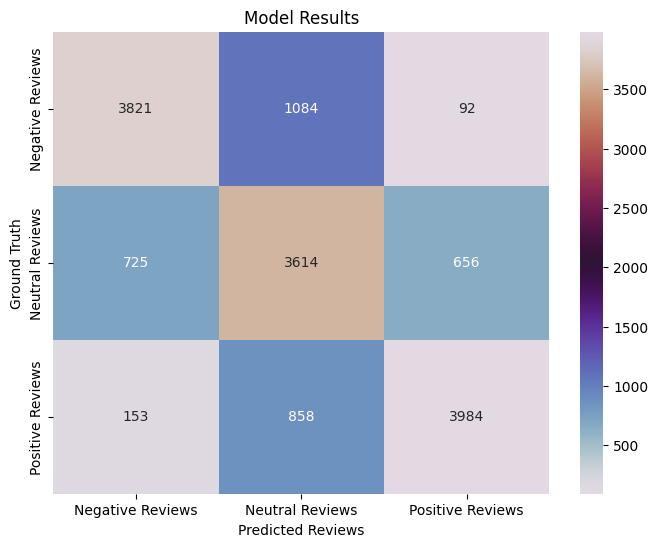

In [45]:
# PLotting the confusion matrix in a heat map
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='twilight', xticklabels=['Negative Reviews',"Neutral Reviews", 'Positive Reviews'],yticklabels=['Negative Reviews',"Neutral Reviews", 'Positive Reviews'])
plt.title('Model Results')
plt.xlabel('Predicted Reviews')
plt.ylabel('Ground Truth')

plt.show()

In [46]:
print(classification_report(ground_Truth, review_Predictions,target_names=['Negative reviews','Neutral Reviews', 'Postive reviews']))

                  precision    recall  f1-score   support

Negative reviews       0.81      0.76      0.79      4997
 Neutral Reviews       0.65      0.72      0.69      4995
 Postive reviews       0.84      0.80      0.82      4995

        accuracy                           0.76     14987
       macro avg       0.77      0.76      0.76     14987
    weighted avg       0.77      0.76      0.76     14987

